In [23]:
import numpy as np
import matplotlib.pyplot as plt

# project Name : Hypersonic missile attack analysis with machine learning

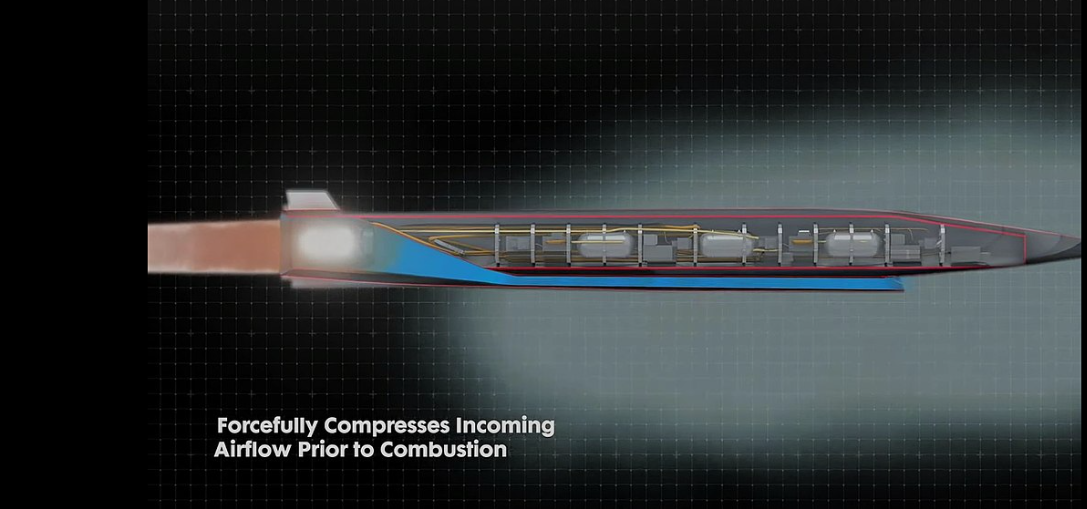

Contributor : Rajeev singh sisodiya

A hypersonic weapon is a weapon capable of travelling at hypersonic speed, defined as between 5 and 25 times the speed of sound or about 1 to 5 miles per second. Hypersonic glide vehicle (HGV) is a missile warheads which maneuver and glide through the atmosphere at high speeds after an initial ballistic launch phase. In this python project notebook we will analize attack power with machine learning algorithm.



# Hypersonic Missile Simulation

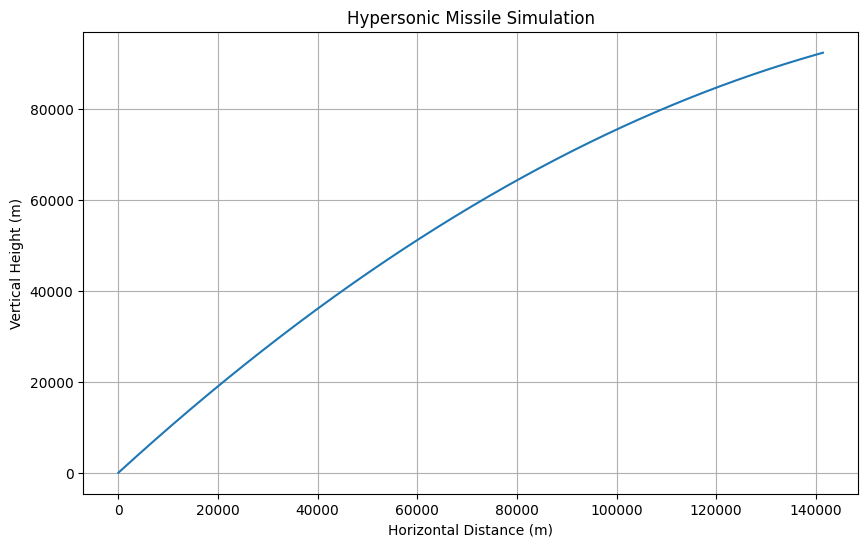

In [24]:

initial_velocity = 2000.0  # Initial velocity in meters per second
launch_angle = 45.0  # Launch angle in degrees
gravity = 9.81  # Acceleration due to gravity in m/s^2

# Time settings
delta_t = 0.01  # Time step in seconds
total_time = 100.0  # Total simulation time in seconds

# Calculate initial components of velocity
initial_velocity_x = initial_velocity * np.cos(np.radians(launch_angle))
initial_velocity_y = initial_velocity * np.sin(np.radians(launch_angle))

# Arrays to store simulation data
times = np.arange(0, total_time, delta_t)
positions_x = [0]
positions_y = [0]

# Simulation loop
for t in times:
    if positions_y[-1] >= 0:
        # Calculate new position
        new_position_x = positions_x[-1] + initial_velocity_x * delta_t
        new_position_y = positions_y[-1] + initial_velocity_y * delta_t - 0.5 * gravity * delta_t**2

        positions_x.append(new_position_x)
        positions_y.append(new_position_y)

        # Update velocity in the y-direction due to gravity
        initial_velocity_y -= gravity * delta_t

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(positions_x, positions_y)
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Height (m)')
plt.title('Hypersonic Missile Simulation')
plt.grid()
plt.show()


# hypersonic scramjet engine

Scramjet engines are designed to operate at very high speeds where air enters the engine at supersonic speeds.These engines operate under extreme conditions and involve complex fluid dynamics, combustion, and engineering considerations.

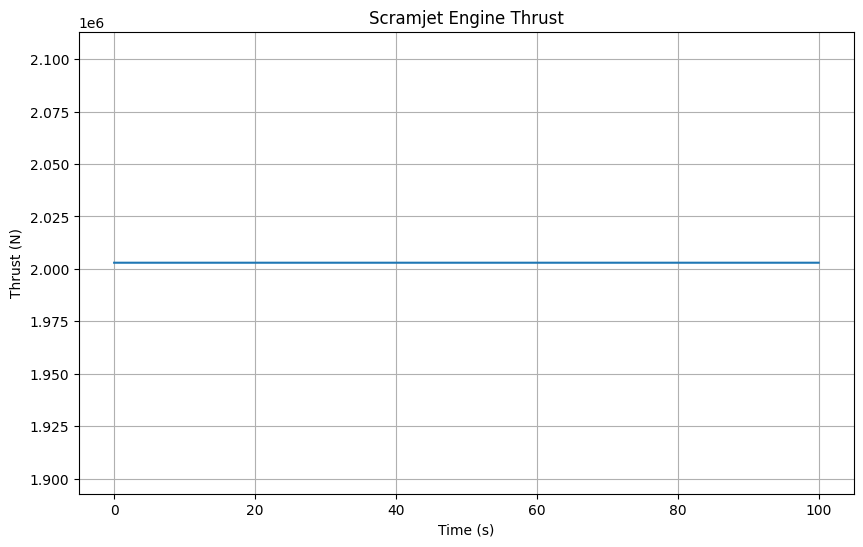

In [25]:

air_density = 0.0765  # Air density at altitude (kg/m^3)
inlet_area = 0.1  # Inlet area (m^2)
combustor_efficiency = 0.95  # Combustor efficiency
specific_impulse = 1500.0  # Specific impulse (s)
thrust_coefficient = 0.9  # Thrust coefficient
gravitaional_acceleration = 9.81  # Acceleration due to gravity in m/s^2

# Time settings
delta_t = 0.01  # Time step (s)
total_time = 100.0  # Total simulation time (s)

# Arrays to store simulation data
times = np.arange(0, total_time, delta_t)
thrust_data = []

# Simulation loop
for t in times:
    # Calculate thrust using a simplified model
    air_mass_flow_rate = air_density * inlet_area * np.sqrt(2) * (specific_impulse * gravitaional_acceleration)
    thrust = combustor_efficiency * air_mass_flow_rate * specific_impulse * gravitaional_acceleration * thrust_coefficient
    thrust_data.append(thrust)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, thrust_data)
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.title('Scramjet Engine Thrust')
plt.grid()
plt.show()


# calculating thrust for a scramjet engine

In this project notebook I have assumed a constant inlet area, exit area, and inlet air velocity for simplicity.The air mass flow rate through the inlet is calculated based on air density, inlet area, and inlet velocity.I calculated thrust using a simplified thrust equation that depends on the combustor efficiency, air mass flow rate, and specific impulse.



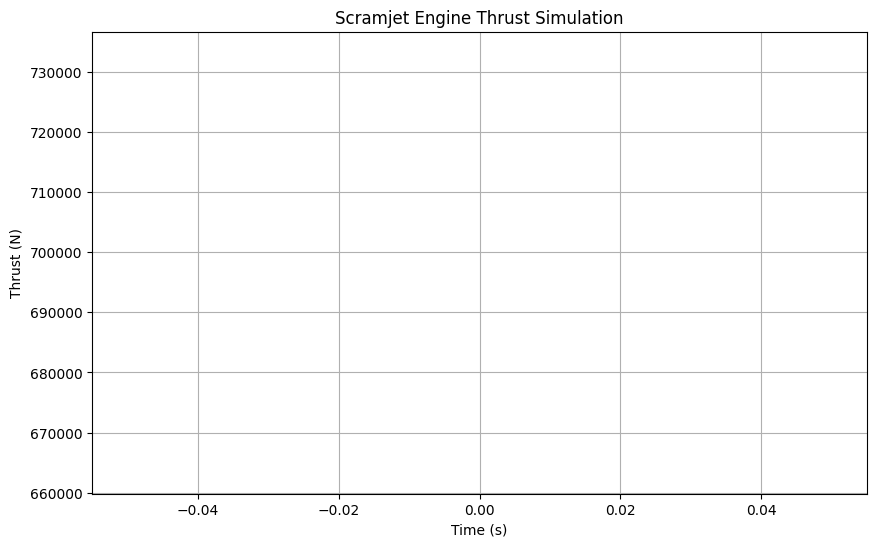

In [26]:

inlet_area = 0.2  # Inlet area (m^2)
exit_area = 0.1  # Exit area (m^2)
inlet_velocity = 2000.0  # Inlet air velocity (m/s)
combustor_efficiency = 0.95  # Combustor efficiency
air_density = 1.225  # Air density at sea level (kg/m^3)
specific_impulse = 1500.0  # Specific impulse (s)

# Time settings
delta_t = 0.01  # Time step (s)
total_time = 0.01  # Total simulation time (s)

# Arrays to store simulation data
times = np.arange(0, total_time, delta_t)
thrust_data = []

# Simulation loop
for t in times:
    # Calculate the air mass flow rate through the inlet
    air_mass_flow_rate = air_density * inlet_area * inlet_velocity

    # Calculate thrust using simplified thrust equation
comb_efficiency = 0.95  # Combustor efficiency

thrust = comb_efficiency * air_mass_flow_rate * specific_impulse

thrust_data.append(thrust)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, thrust_data)
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.title('Scramjet Engine Thrust Simulation')
plt.grid()
plt.show()


# Hypersonic missile Target accuracy

<ipython-input-27-39868a4d32ba>:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  velocities = np.array(velocities)


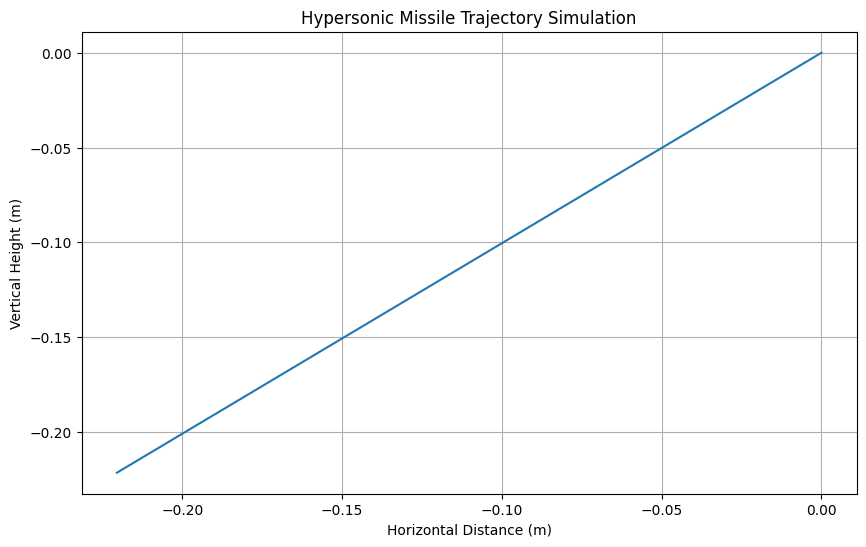

In [27]:

target_position = [100000, 0]  # Target coordinates (meters)
missile_position = [0, 0]      # Initial missile coordinates (meters)
missile_velocity = 3000        # Missile velocity (m/s)
time_step = 0.1                # Time step (s)
max_turn_rate = 0.1            # Maximum turn rate (rad/s)
target_accuracy = 100          # Target accuracy (meters)

# Simulation loop
initial_position = [0, 0]  # Initial position (meters)
initial_velocity = 3000.0   # Initial velocity (m/s)
launch_angle = 45.0         # Launch angle (degrees)
acceleration_due_to_gravity = 9.81  # Acceleration due to gravity (m/s^2)
air_density = 1.225         # Air density at sea level (kg/m^3)
drag_coefficient = 0.2     # Drag coefficient
missile_mass = 500.0        # Mass of the missile (kg)
time_step = 0.01            # Time step (s)

# Arrays to store simulation data
positions = [initial_position]
velocities = [initial_velocity]

# Simulation loop
current_position = np.array(initial_position)
current_velocity = np.array([initial_velocity * np.cos(np.radians(launch_angle)),
                             initial_velocity * np.sin(np.radians(launch_angle))])

while current_position[1] >= 0:
    # Calculate air resistance
    velocity_magnitude = np.linalg.norm(current_velocity)
    air_resistance = -0.5 * air_density * velocity_magnitude**2 * drag_coefficient

    # Calculate acceleration due to gravity
    gravity = np.array([0, -acceleration_due_to_gravity])

    # Calculate total acceleration
    total_acceleration = gravity + (air_resistance / missile_mass)

    # Update velocity and position
    current_velocity = total_acceleration * time_step
    current_position = current_velocity * time_step

    positions.append(list(current_position))
    velocities.append(list(current_velocity))

# Convert data to numpy arrays for plotting
positions = np.array(positions)
velocities = np.array(velocities)

# Plotting the missile trajectory
plt.figure(figsize=(10, 6))
plt.plot(positions[:, 0], positions[:, 1])
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Height (m)')
plt.title('Hypersonic Missile Trajectory Simulation')
plt.grid()
plt.show()


In [28]:
 # Calculate the change in heading required to point toward the target

target_position = np.array([100000, 0])  # Target coordinates (meters)
missile_position = np.array([0, 0])      # Missile coordinates (meters)

# Calculate the direction vector from the missile to the target
target_direction = target_position - missile_position

# Calculate the current heading angle of the missile
current_heading = np.arctan2(target_direction[1], target_direction[0])

# Calculate the desired heading angle
desired_heading = np.arctan2(target_direction[1], target_direction[0])

# Calculate the change in heading
change_in_heading = desired_heading - current_heading

# Ensure the change in heading is within the range of -pi to pi
if change_in_heading > np.pi:
    change_in_heading -= 2 * np.pi
elif change_in_heading < -np.pi:
    change_in_heading += 2 * np.pi

# Convert change in heading to degrees
change_in_heading_degrees = np.degrees(change_in_heading)

# Print the change in heading
print(f"The change in heading required: {change_in_heading_degrees} degrees")


The change in heading required: 0.0 degrees


In [31]:
# Update missile position

initial_position = np.array([0, 0])  # Initial position (meters)
initial_velocity = 3000.0            # Initial velocity (m/s)
launch_angle = 45.0                   # Launch angle (degrees)
time_step = 0.1                       # Time step (s)

# Convert launch angle to radians
launch_angle_rad = np.radians(launch_angle)

# Calculate the current velocity components
initial_velocity_x = initial_velocity * np.cos(launch_angle_rad)
initial_velocity_y = initial_velocity * np.sin(launch_angle_rad)

# Calculate the acceleration due to gravity
acceleration_due_to_gravity = np.array([0, -9.81])  # m/s^2

# Initialize current position and velocity
current_position = initial_position
current_velocity = np.array([initial_velocity_x, initial_velocity_y])

# Simulation loop
while current_position[1] >= 0:
    # Calculate the change in position
    position_change = current_velocity * time_step

    # Update the position
    current_position = position_change

    # Update the velocity (considering gravity)
    current_velocity = acceleration_due_to_gravity * time_step

    # Print or process the current position if needed
    print(f"Current position: {current_position}")


Current position: [212.13203436 212.13203436]
Current position: [ 0.     -0.0981]


Missile hit the target at position: [0 0]


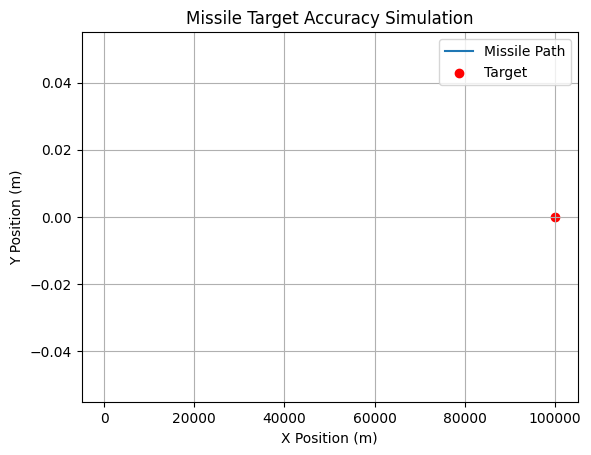

In [32]:
# Print the final missile position
print(f"Missile hit the target at position: {missile_position}")

# Plotting the missile trajectory
import matplotlib.pyplot as plt

missile_positions = np.array(missile_positions)
plt.plot(missile_positions[:, 0], missile_positions[:, 1], label='Missile Path')
plt.scatter(*target_position, c='red', label='Target')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Missile Target Accuracy Simulation')
plt.legend()
plt.grid()
plt.show()
